In [1]:
userID = 'adamranson'
expID = '2024-09-07_05_ESYB001'

In [2]:
import pickle
import os
import organise_paths
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

import cv2
from io import BytesIO
import IPython.display as display
from ipywidgets import interact, interactive, fixed, interact_manual, Button, HBox, VBox, Label, Image as ImageWidget
import ipywidgets as widgets
from PIL import Image
import threading
from scipy.ndimage import median_filter

animalID, remote_repository_root, processed_root, exp_dir_processed, exp_dir_raw = organise_paths.find_paths(userID, expID)
exp_dir_processed_recordings = os.path.join(exp_dir_processed,'recordings')
exp_dir_processed_cut = os.path.join(exp_dir_processed,'cut')



# Whole experiment view

## All rois

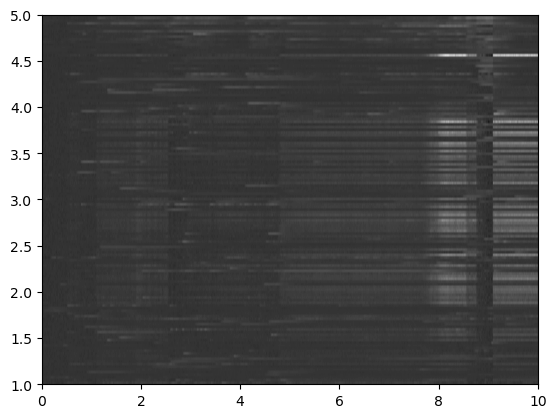

In [3]:
# check how many channels there are
ca_data = {}
try:
    with open(os.path.join(exp_dir_processed_recordings,('s2p_ch' + str(0)+'.pickle')), "rb") as file: ca_data['green'] = pickle.load(file)

except:
    dummy=0
    # a channel not found

try:
    with open(os.path.join(exp_dir_processed_recordings,('s2p_ch' + str(1)+'.pickle')), "rb") as file: ca_data['red'] = pickle.load(file)
except:
    dummy=0
    # a channel not found

if 'green' in ca_data.keys():
    plt.imshow(ca_data['green']['dF'], cmap='gray', extent=[0, 10, 1, 5], aspect='auto')
    plt.show()

## Pupil properties vs time

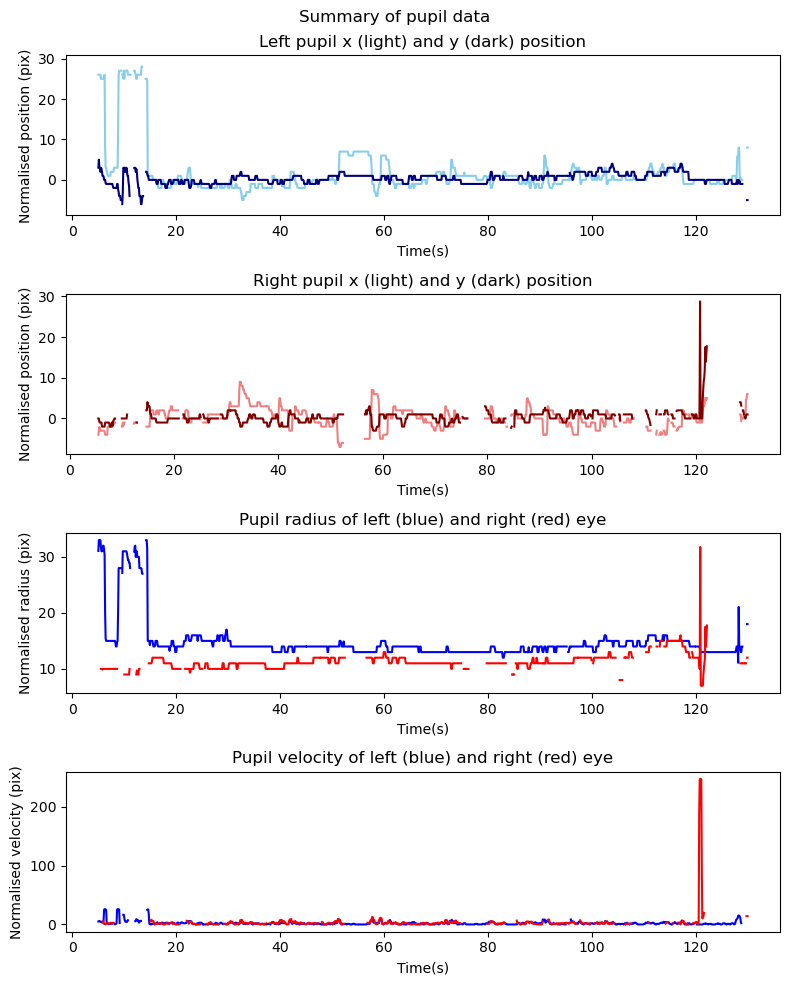

In [4]:
left_resampled = pickle.load(open(os.path.join(exp_dir_processed_recordings,'dlcEyeLeft_resampled.pickle'), "rb"))
right_resampled = pickle.load(open(os.path.join(exp_dir_processed_recordings,'dlcEyeRight_resampled.pickle'), "rb"))

# Create a 3-row subplot to plot pupil position, radius and velocity
fig, axs = plt.subplots(4, 1, figsize=(8, 10))
# Plot data on each subplot
axs[0].plot(left_resampled['t'], left_resampled['x']-np.nanmedian(left_resampled['x']), color = 'skyblue')
axs[0].plot(left_resampled['t'], left_resampled['y']-np.nanmedian(left_resampled['y']), color = 'navy')
axs[0].set_title('Left pupil x (light) and y (dark) position')
axs[0].set_xlabel('Time(s)')
axs[0].set_ylabel('Normalised position (pix)')

axs[1].plot(right_resampled['t'], right_resampled['x']-np.nanmedian(right_resampled['x']), color = 'lightcoral')
axs[1].plot(right_resampled['t'], right_resampled['y']-np.nanmedian(right_resampled['y']), color = 'maroon')
axs[1].set_title('Right pupil x (light) and y (dark) position')
axs[1].set_xlabel('Time(s)')
axs[1].set_ylabel('Normalised position (pix)')

axs[2].plot(left_resampled['t'], left_resampled['radius'], color = 'blue')
axs[2].plot(right_resampled['t'], right_resampled['radius'], color = 'red')
axs[2].set_title('Pupil radius of left (blue) and right (red) eye')
axs[2].set_xlabel('Time(s)')
axs[2].set_ylabel('Normalised radius (pix)')

axs[3].plot(left_resampled['t'], left_resampled['velocity'], color = 'blue')
axs[3].plot(right_resampled['t'], right_resampled['velocity'], color = 'red')
axs[3].set_title('Pupil velocity of left (blue) and right (red) eye')
axs[3].set_xlabel('Time(s)')
axs[3].set_ylabel('Normalised velocity (pix)')
# Add overall title and adjust spacing
fig.suptitle('Summary of pupil data')
fig.tight_layout()
# Show the plot
plt.show()